In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


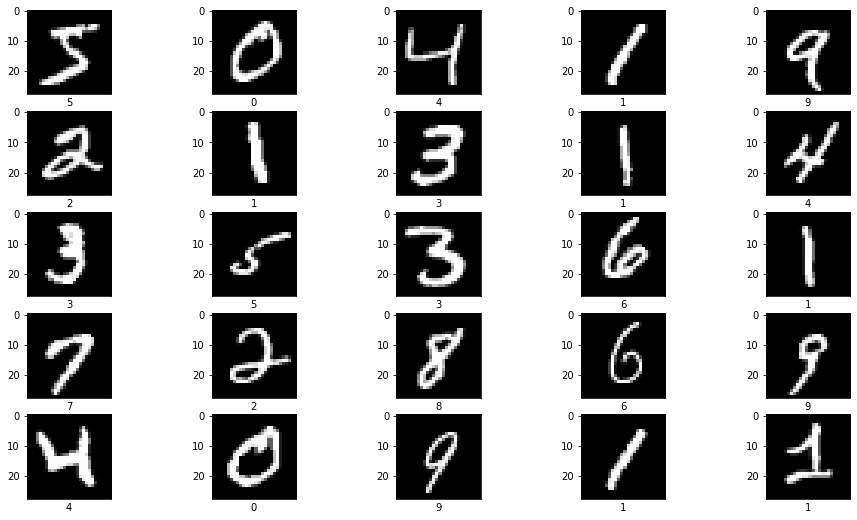

In [ ]:
plt.figure(figsize=(16,9))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.xlabel(y_train[i])
  plt.imshow(x_train[i], cmap='gray')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# normalize
x_train = x_train / 255
x_test = x_test/ 255

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(-1, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.2270 - accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0752 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0419 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0334 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 63s 34m

In [ ]:
#evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0518 - accuracy: 0.9873


[0.051828399300575256, 0.9872999787330627]